In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#drop columns 2,3,4
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#Rename thecolumns
df.rename(columns={'v1':'Type','v2':'Text'},inplace = True)

In [10]:
# check for duplicates and drop them

df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(5169, 2)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Type'] = encoder.fit_transform(df['Type'])

C:\Users\SAI SIREESHA\Downloads\mongosh-1.8.2-win32-x64(1).zip\mongosh-1.8.2-win32-x64\ipykernel_8332\3175929168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = encoder.fit_transform(df['Type'])


In [15]:
df.head(5)

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2.EDA




In [16]:
import matplotlib.pyplot as plt

In [17]:
df['Type'].value_counts()

0    4516
1     653
Name: Type, dtype: int64

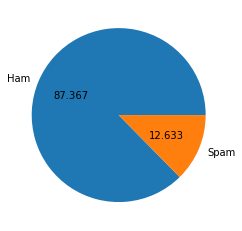

In [18]:
plt.pie(df['Type'].value_counts(),labels =['Ham','Spam'],autopct="%0.3f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SAI
[nltk_data]     SIREESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['no_of_char']= df['Text'].apply(len)

C:\Users\SAI SIREESHA\Downloads\mongosh-1.8.2-win32-x64(1).zip\mongosh-1.8.2-win32-x64\ipykernel_8332\3797471815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_char']= df['Text'].apply(len)


In [22]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\SAI SIREESHA\Downloads\mongosh-1.8.2-win32-x64(1).zip\mongosh-1.8.2-win32-x64\ipykernel_8332\333467549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [23]:
df['num_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\SAI SIREESHA\Downloads\mongosh-1.8.2-win32-x64(1).zip\mongosh-1.8.2-win32-x64\ipykernel_8332\2610337338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [24]:
df.head()

,Type,Text,no_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1



## 3.Data Preprocessing


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure the required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    text = [word for word in text if word.isalnum()]

    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]

    # Stem the words
    text = [ps.stem(word) for word in text]

    # Join the list into a string
    return " ".join(text)


[nltk_data] Downloading package punkt to C:\Users\SAI
[nltk_data]     SIREESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SAI
[nltk_data]     SIREESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\SAI SIREESHA\Downloads\mongosh-1.8.2-win32-x64(1).zip\mongosh-1.8.2-win32-x64\ipykernel_8332\1235748540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [27]:
df

,Type,Text,no_of_char,num_words,num_sent,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:

3


spam_corpus = []
for msg in df[df['Type']==1]['Transformed_text'].tolist():
    for word in msg.split(' '):
        spam_corpus.append(word)

In [30]:
len(spam_corpus)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [31]:
from collections import Counter

In [34]:
words,counts = zip(*(Counter(spam_corpus).most_common(50)))

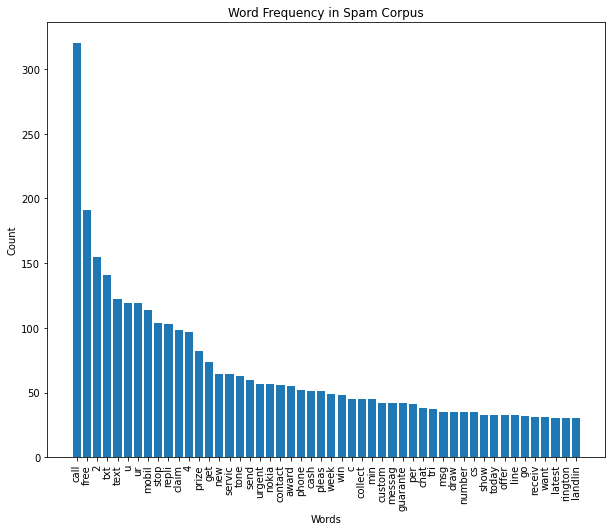

In [35]:
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Frequency in Spam Corpus')
plt.show()

In [36]:
ham_corpus = []
for msg in df[df['Type']==0]['Transformed_text'].tolist():
    for word in msg.split(' '):
        ham_corpus.append(word)

In [37]:
len(ham_corpus)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [38]:
words,counts = zip(*(Counter(ham_corpus).most_common(50)))

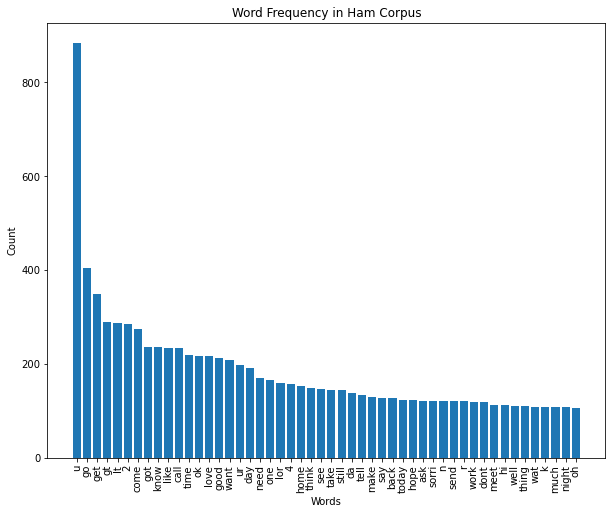

In [39]:
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Frequency in Ham Corpus')
plt.show()

## 4. Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()

In [71]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [72]:
X.shape

(5169, 6708)

In [73]:
y = df['Type'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [78]:
gnb =  GaussianNB()
mnb =  MultinomialNB()
bnb =  BernoulliNB()

In [79]:
#Gaussian NAive Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)


print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.8762088974854932
[[1205  155]
 [  37  154]]
0.49838187702265374


In [80]:
# Multinomial Naive bayes

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)


print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[1360    0]
 [  69  122]]
1.0


In [81]:
#Bernoulli NB

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)


print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9696969696969697
[[1356    4]
 [  43  148]]
0.9736842105263158


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9348807221147647, 0.7419354838709677)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9348807221147647
Precision -  0.7419354838709677
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9677627337201805
Precision -  0.8507462686567164
For  DT
Accuracy -  0.9335912314635719
Precision -  0.94
For  LR
Accuracy -  0.9729206963249516
Precision -  0.9745222929936306
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9645390070921985
Precision -  0.9415584415584416
For  BgC
Accuracy -  0.9606705351386202
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9742101869761445
Precision -  0.9870967741935484
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.952


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [57]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
5,RF,0.970986,1.000000
8,ETC,0.974210,0.987097
4,LR,0.972921,0.974522
9,GBDT,0.949710,0.952000
6,AdaBoost,0.964539,0.941558
3,DT,0.933591,0.940000
7,BgC,0.960671,0.916667
2,NB,0.967763,0.850746
0,SVC,0.934881,0.741935


In [82]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))